# Fifa19 Player Analysis

Fifa 19 is a very populer video games which share all the players' info collected from fifa according to their performance.This is a great dataset to explore the different abilities of different players. It also gives us the countrywise and clubwise player info. This is a short analysis of football players from the data provided by Fifa19 games.

## Data Preparation and Cleaning

Importing different libraries to do this job and taking necessary steps to clean the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Load datasets and checking the number of row and column of the dataset

In [2]:
fifa19_raw_df = pd.read_csv('data/fifa19_data.csv')
fifa19_raw_df.shape

(18207, 89)

In [3]:
fifa19_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

Select some specific columns which we want explore and drop other columns.

In [4]:
selected_columns =[
    'ID', 'Name', 'Age', 'Nationality', 'Club', 'Overall', 'Position','Jersey Number', 'Value', 'Preferred Foot', 'Dribbling','Release Clause','BallControl', 'Height' 
]

In [5]:
fifa19_df = fifa19_raw_df[selected_columns].copy()
fifa19_df.describe()

,ID,Age,Overall,Jersey Number,Dribbling,BallControl
count,18207.000000,18207.000000,18207.000000,18147.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,19.546096,55.371001,58.369459
std,29965.244204,4.669943,6.908930,15.947765,18.910371,16.686595
min,16.000000,16.000000,46.000000,1.000000,4.000000,5.000000
25%,200315.500000,21.000000,62.000000,8.000000,49.000000,54.000000
50%,221759.000000,25.000000,66.000000,17.000000,61.000000,63.000000
75%,236529.500000,28.000000,71.000000,26.000000,68.000000,69.000000
max,246620.000000,45.000000,94.000000,99.000000,97.000000,96.000000


Take some idea of the data table by viewing the table

In [6]:
fifa19_df.head()

,ID,Name,Age,Nationality,Club,Overall,Position,Jersey Number,Value,Preferred Foot,Dribbling,Release Clause,BallControl,Height
0,158023,L. Messi,31,Argentina,FC Barcelona,94,RF,10.0,€110.5M,Left,97.0,€226.5M,96.0,5'7
1,20801,Cristiano Ronaldo,33,Portugal,Juventus,94,ST,7.0,€77M,Right,88.0,€127.1M,94.0,6'2
2,190871,Neymar Jr,26,Brazil,Paris Saint-Germain,92,LW,10.0,€118.5M,Right,96.0,€228.1M,95.0,5'9
3,193080,De Gea,27,Spain,Manchester United,91,GK,1.0,€72M,Right,18.0,€138.6M,42.0,6'4
4,192985,K. De Bruyne,27,Belgium,Manchester City,91,RCM,7.0,€102M,Right,86.0,€196.4M,91.0,5'11


## Exploratory Analysis and Visualization

### Countries with the highest percentages of players

In [7]:
countries_with_highest_players = fifa19_df['Nationality'].value_counts().head(10)
countries_with_highest_players*100/countries_with_highest_players.sum()

England        18.756348
Germany        13.519919
Spain          12.097957
Argentina      10.574427
France         10.314863
Brazil          9.333032
Italy           7.922356
Colombia        6.974382
Japan           5.394425
Netherlands     5.112290
Name: Nationality, dtype: float64

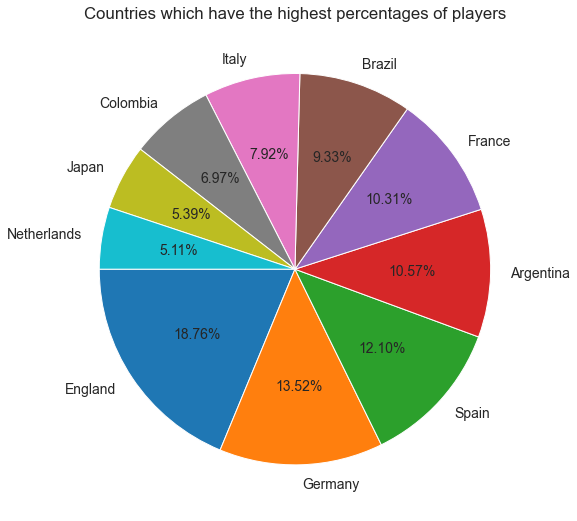

In [8]:
# Plotting the values
plt.figure(figsize=(18,9))
plt.title("Countries which have the highest percentages of players")
plt.pie(countries_with_highest_players*100/countries_with_highest_players.sum(), labels=countries_with_highest_players.index, autopct='%1.2f%%', startangle=180);

The top 10 countries which have the highest percentages of players included in the Fifa 19 players list are shown here. Here, England has the highest number of players about 18.75%. Second comes Germany with 13.52% players and Spain in 3rd with 12.09% players. The 10th country is the Netherlands which has about 5.11% players included in Fifa 19 list.

### Countries with the highest parcentages of high rated players

In [9]:
countries_with_highest_rated_players = fifa19_df[fifa19_df['Overall']>fifa19_df["Overall"].mean()]['Nationality'].value_counts().head(10)
countries_with_highest_rated_players*100/countries_with_highest_rated_players.sum()

Spain          14.974726
Brazil         14.279697
Argentina      12.636900
Germany        11.141533
France         10.783488
England        10.551811
Italy           8.866891
Colombia        5.960404
Portugal        5.539174
Netherlands     5.265375
Name: Nationality, dtype: float64

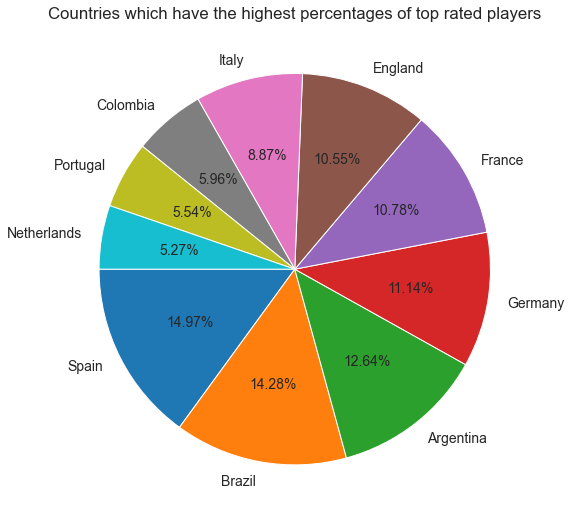

In [10]:
# Plotting the values
plt.figure(figsize=(18,9))
plt.title("Countries which have the highest percentages of top rated players")
plt.pie(countries_with_highest_rated_players*100/countries_with_highest_rated_players.sum(), labels=countries_with_highest_rated_players.index, autopct='%1.2f%%', startangle=180);

The top 10 countries which have the highest number of players whos' overall point is higher than the average overall point included in the Fifa 19 players list are shown below. Here, Spain has the highest number about 14.97% players. Second comes Brazil with 14.27% players and Argentina in 3rd with 12.64% players. The 10th country is the Netherlands which has about 5.26% players included in Fifa 19 list. In this list, the position of Germany and England goes down.

### Clubs with the highest number of players


In [11]:
clubs_with_highest_players = fifa19_df['Club'].value_counts().head(25)
clubs_with_highest_players

Empoli                     33
Chelsea                    33
Real Madrid                33
Frosinone                  33
Liverpool                  33
Tottenham Hotspur          33
Southampton                33
Newcastle United           33
CD Leganés                 33
Manchester United          33
Wolverhampton Wanderers    33
Borussia Dortmund          33
Valencia CF                33
Eintracht Frankfurt        33
Burnley                    33
TSG 1899 Hoffenheim        33
Arsenal                    33
Cardiff City               33
Manchester City            33
Everton                    33
Rayo Vallecano             33
AS Monaco                  33
Atlético Madrid            33
FC Barcelona               33
RC Celta                   33
Name: Club, dtype: int64

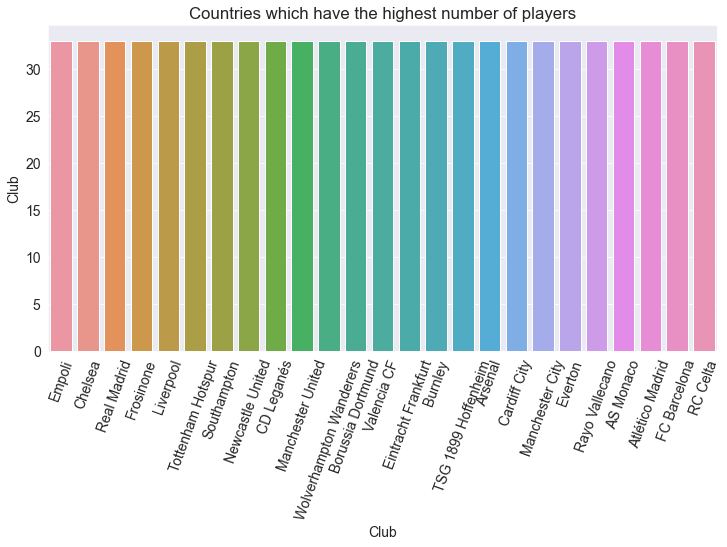

In [12]:
# Plotting the values
plt.figure(figsize=(12,6))
plt.xticks(rotation=70)
plt.title("Countries which have the highest number of players")
plt.xlabel("Club")
plt.ylabel("Number of players")
sns.barplot(x=clubs_with_highest_players.index, y =clubs_with_highest_players);

The top clubs which have the highest number of players included in the Fifa 19 players list are shown below. Here, all the clubs has the same number of players and it is about 33 players.

### Countries with the highest number of players

In [13]:
clubs_with_highest_rated_players = fifa19_df[fifa19_df['Overall']>fifa19_df["Overall"].mean()]['Club'].value_counts().head(10)
clubs_with_highest_rated_players

Vitória Guimarães      29
Eintracht Frankfurt    29
Sporting CP            28
CD Leganés             28
SL Benfica             28
Olympiacos CFP         28
Everton                28
Lazio                  28
Chelsea                27
Manchester United      27
Name: Club, dtype: int64

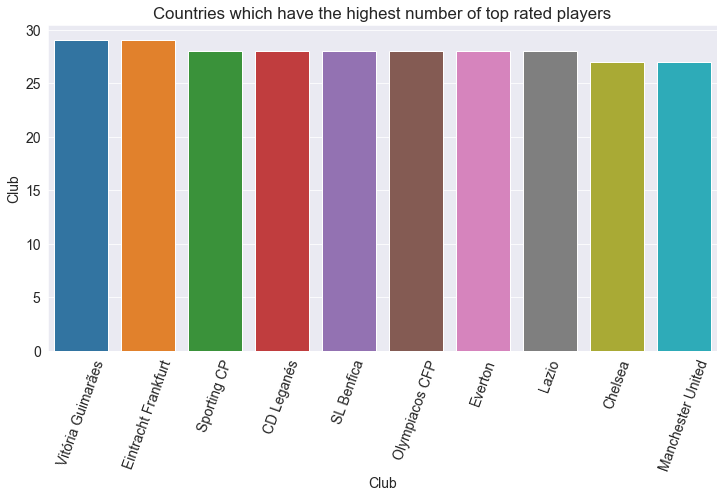

In [14]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=70)
plt.title("Countries which have the highest number of top rated players")
plt.xlabel("Club")
plt.ylabel("Number of players")
sns.barplot(x=clubs_with_highest_rated_players.index, y =clubs_with_highest_rated_players);

The top 10 countries which have the highest number of players included in the Fifa 19 players list are shown below. Here, Eintracht Frankfurt and Vitória Guimarães have the highest number about 29 players. And next six clubs have 28 playes. The last two clubs have 27 players.

### Parcentages of players by their age

In [15]:
players_by_age = fifa19_df['Age'].value_counts()
players_by_age =players_by_age.sort_index() 
players_by_age

16      42
17     289
18     732
19    1024
20    1240
21    1423
22    1340
23    1332
24    1358
25    1319
26    1387
27    1162
28    1101
29     959
30     917
31     707
32     574
33     408
34     404
35     196
36     127
37      82
38      37
39      25
40      13
41       5
42       1
44       2
45       1
Name: Age, dtype: int64

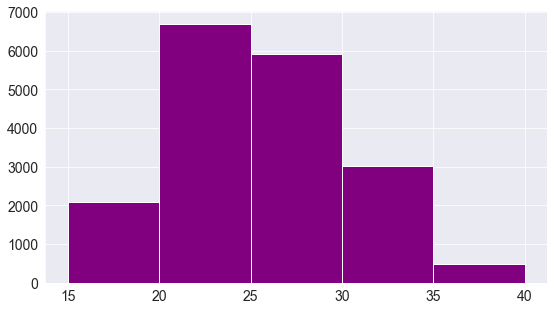

In [16]:
# Plotting the values
plt.hist(fifa19_df.Age, bins=np.arange(15,45,5), color='purple');

In the Fifa 19s' list, players are available age 16 to 40. Here the maximum number of players are from the range of 21-25 years old and the lowest percentage of players are from age of 35-40.

## Asking and Answering Questions

Here I will find some answer to get more information from this datasets. My questions are - 

1. Which country have the highest number of Goal Keeper?

2. Which country have the highest number of Jersey no. 10 players?

3. Which country have the maximum number of dribbler with higher ability?

4. Which country have the maximum number of players with higher Ball controlling ability?

5. Show the percentages of players by their preferred foot

#### Q1: Which country have the highest number of Goal Keeper?

In [17]:
only_gk = fifa19_df[fifa19_df["Position"]=="GK"]
gk_by_countries =only_gk["Nationality"].value_counts().head(10)
gk_by_countries 

England          174
Germany          164
Spain            116
France           101
Argentina         97
Italy             92
United States     72
Brazil            68
Japan             61
Poland            59
Name: Nationality, dtype: int64

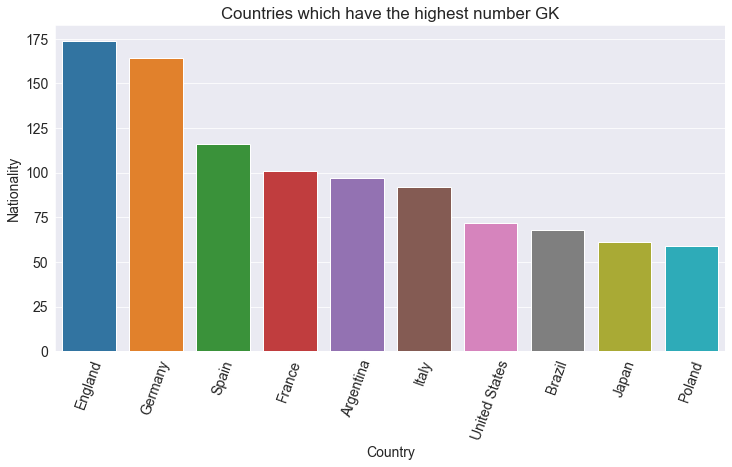

In [18]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=70)
plt.title("Countries which have the highest number GK")
plt.xlabel("Country")
plt.ylabel("Number of Gk")
ax=sns.barplot(x=gk_by_countries .index, y=gk_by_countries );

Answer: England has the highest number of Gk which is about 174 in number.

#### Q2: Which country have the highest number of Jersey no. 10 players?

In [19]:
jersy_10_palyers = fifa19_df[fifa19_df["Jersey Number"]==10]
jersy10_by_countries =jersy_10_palyers["Nationality"].value_counts().head(10)
jersy10_by_countries

England      52
Brazil       42
Argentina    38
Germany      38
Spain        36
France       26
Colombia     24
Italy        23
Sweden       16
Portugal     15
Name: Nationality, dtype: int64

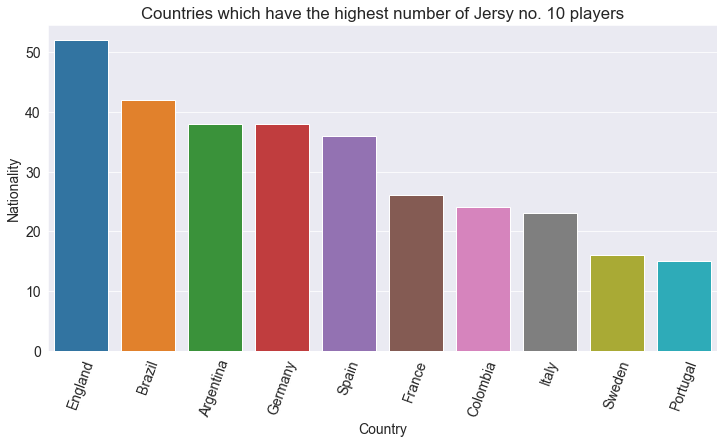

In [20]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=70)
plt.title("Countries which have the highest number of Jersy no. 10 players")
plt.xlabel("Country")
plt.ylabel("Number of Jersy no. 10 players")
sns.barplot(x=jersy10_by_countries.index, y=jersy10_by_countries );

Answer: England has the highest number of Jersy no 10 which is about 52 in number.

#### Q3: Which country have the maximum number of dribbler with higher ability?

In [21]:
dribbler = fifa19_df[fifa19_df["Dribbling"]>80]
dribbler_by_country = dribbler["Nationality"].value_counts().head(10)
dribbler_by_country 

Spain          58
Brazil         42
Argentina      38
France         27
Germany        25
Portugal       23
Italy          20
England        18
Netherlands    12
Belgium        10
Name: Nationality, dtype: int64

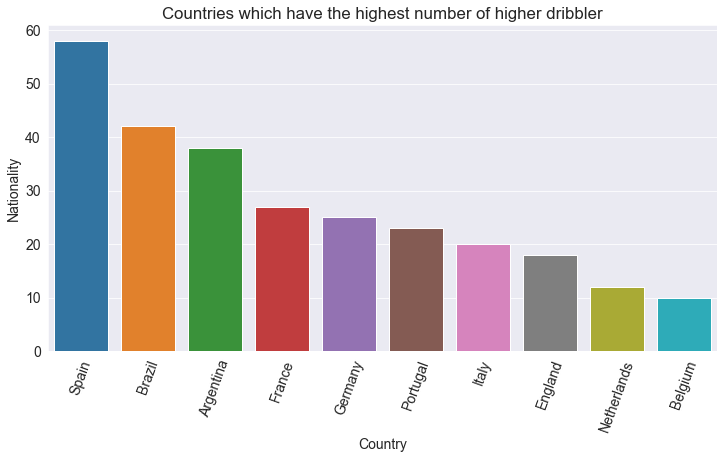

In [22]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=70)
plt.title("Countries which have the highest number of higher dribbler")
plt.xlabel("Country")
plt.ylabel("Number of Jersy no. 10 players")
sns.barplot(x=dribbler_by_country .index, y=dribbler_by_country );

Spain has the maximum number of players with higher dribbling ability.

#### Q4:Which country have the maximum number of players with higher Ball controlling ability?

In [23]:
BallController = fifa19_df[fifa19_df["BallControl"]>80]
BallController_by_country = BallController["Nationality"].value_counts().head(10)
BallController_by_country 

Spain        76
Brazil       42
Argentina    38
Germany      32
France       27
Portugal     23
Italy        21
England      14
Belgium      12
Croatia      11
Name: Nationality, dtype: int64

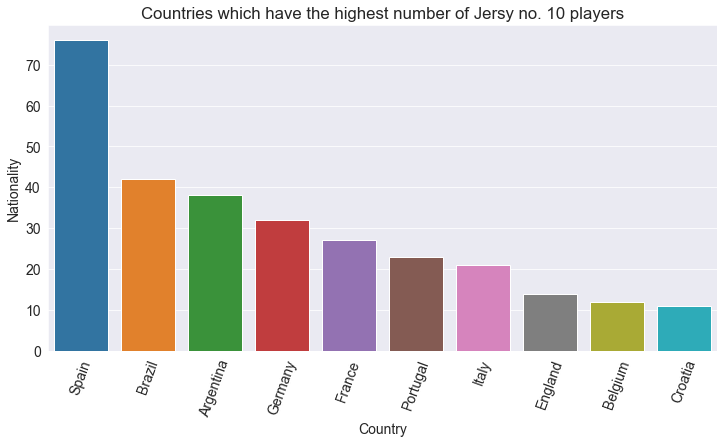

In [24]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=70)
plt.title("Countries which have the highest number of Jersy no. 10 players")
plt.xlabel("Country")
plt.ylabel("Number of Jersy no. 10 players")
sns.barplot(x=BallController_by_country.index, y=BallController_by_country );

Spain has the maximum number of players with higher Ball controlling ability.

#### Q5: Show the percentages of players by their preferred foot

In [25]:
total = fifa19_df.shape[0]
left_footed = fifa19_df[fifa19_df["Preferred Foot"]=="Left"]["ID"].count()
right_footed = fifa19_df[fifa19_df["Preferred Foot"]=="Right"]["ID"].count()
none_of_these = (total-left_footed - right_footed)

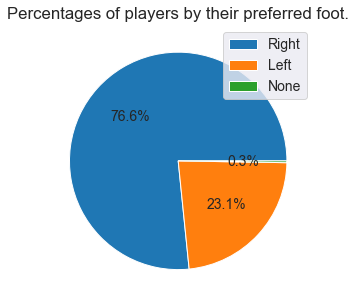

In [26]:
plt.title("Percentages of players by their preferred foot.")
plt.pie([right_footed, left_footed, none_of_these],autopct='%1.1f%%')
plt.legend(["Right", "Left", "None"])

From the chart, 76.6% players are right footed and 23.1 are left footed.

## Inferences and Conclusion

After analyzing the whole dataset, we have come to some conclusion that --

1. England has the highest number of players about 18.75%. Second comes Germany with 13.52% players and Spain in 3rd with 12.09% players

2.  Spain has the highest number about 14.97% players. Second comes Brazil with 14.27% players and Argentina in 3rd with 12.64% players.

3. Most of the top listed countrys has the same number of players and it is about 33 players.

4. Eintracht Frankfurt and Vitória Guimarães have the highest number about 29 players.

5. The maximum number of players are from the range of 21-25 years old and the lowest percentage of players are from age of 35-40.

6. England has the highest number of Gk which is about 174 in number.

7. England has the highest number of Jersy no 10 which is about 52 in number. 

8. Spain has the maximum number of players with higher dribbling ability.

9. Spain has the maximum number of players with higher Ball controlling ability.

10. 76.6% players are right footed and 23.1 are left footed.

## Future Work

The data set have more columns to analyze. I will try to explore more details from this dataset.

# References

Data link: 'https://www.kaggle.com/karangadiya/fifa19' 

Numpy Documentation: https://numpy.org/devdocs/user/quickstart.html

User guide for Pandas: https://pandas.pydata.org/docs/user_guide/index.html

Seaborn gallery: https://seaborn.pydata.org/examples/index.html

Matplotlib gallery: https://matplotlib.org/3.1.1/gallery/index.html